In [1]:
import matplotlib
import matplotlib.pyplot as plt
import torch
import librosa
import numpy as np
from onsets_and_frames.mel import MelSpectrogram

In [6]:
data = torch.load('/home/svcapp/userdata/musicai/MAESTRO/2009/MIDI-Unprocessed_19_R1_2009_03-04_ORIG_MID--AUDIO_19_R1_2009_19_R1_2009_04_WAV.pt2')

In [7]:
label = data['label'].squeeze().numpy().transpose()

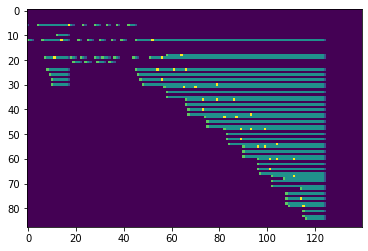

In [10]:
plt.imshow(label[:,100:240], aspect='auto')

In [64]:
SAMPLE_RATE = 16000
HOP_LENGTH = SAMPLE_RATE * 32 // 1000
N_MELS = 229
MEL_FMIN = 30
MEL_FMAX = SAMPLE_RATE // 2
WINDOW_LENGTH = 2048
melspectrogram = MelSpectrogram(N_MELS, SAMPLE_RATE, WINDOW_LENGTH, HOP_LENGTH,
                                mel_fmin=MEL_FMIN, mel_fmax=MEL_FMAX)

        

In [68]:
mel = melspectrogram(data['audio'].unsqueeze(0).float().div_(32768.0))

In [42]:
audio = data['audio'].float().div_(32768.0).numpy()
max(audio)

0.22891235

In [53]:
spec = librosa.amplitude_to_db(np.abs(librosa.stft(audio)))

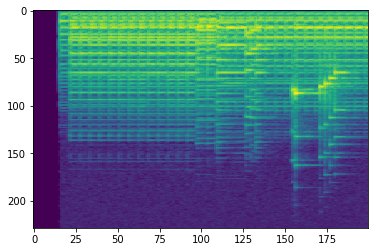

In [70]:
plt.imshow(mel[0,:,0:200], aspect='auto')